In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyfolio as pf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

c:\Users\HP Victus 16\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
sp500 = yf.Ticker("^GSPC") ## S&P-500

startDate = "2010-01-01"
endDate = "2024-01-01"

df = sp500.history(interval="1d", start=startDate, end=endDate)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,0.0,0.0
2010-01-05 00:00:00-05:00,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,0.0,0.0
2010-01-06 00:00:00-05:00,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,0.0,0.0
2010-01-07 00:00:00-05:00,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,0.0,0.0
2010-01-08 00:00:00-05:00,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,0.0,0.0
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,0.0,0.0
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,0.0,0.0


In [3]:
# Drop Dividends column
df.drop(columns=['Dividends'], inplace=True)

# Drop Stock Splits column
df.drop(columns=['Stock Splits'], inplace=True)

In [4]:
## Calculate Simple Moving Average (SWA) using rolling mean.
df['SMA'] = df['Close'].rolling(window=14).mean()

## Calculate EMA-12 and EMA-26 using Exponential Weighing Average (EWM)
df['EMA-12'] = df['Close'].ewm(span = 12, adjust = False).mean()
df['EMA-26'] = df['Close'].ewm(span = 26, adjust = False).mean()

## Calculate MACD 
df['MACD'] = df['EMA-12'] - df['EMA-26']

In [5]:
df

,Open,High,Low,Close,Volume,SMA,EMA-12,EMA-26,MACD
Date,,,,,,,,,
2010-01-04 00:00:00-05:00,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,NaN,1132.989990,1132.989990,0.000000
2010-01-05 00:00:00-05:00,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,NaN,1133.533072,1133.251474,0.281598
2010-01-06 00:00:00-05:00,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,NaN,1134.087986,1133.539514,0.548472
2010-01-07 00:00:00-05:00,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,NaN,1135.257518,1134.143249,1.114268
2010-01-08 00:00:00-05:00,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,NaN,1136.753281,1134.945970,1.807311
...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,4673.364990,4694.952226,4617.779082,77.173143
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,4688.191406,4707.228806,4629.406558,77.822249
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,4704.779994,4718.667463,4640.678670,77.988793


In [6]:
## Calculate RSI using formula
## RSI = 100 – [100 ÷ ( 1 + (Average Gain During Up Periods ÷ Average Loss During Down Periods ))]

delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

In [7]:
df

,Open,High,Low,Close,Volume,SMA,EMA-12,EMA-26,MACD,RSI
Date,,,,,,,,,,
2010-01-04 00:00:00-05:00,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,NaN,1132.989990,1132.989990,0.000000,NaN
2010-01-05 00:00:00-05:00,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,NaN,1133.533072,1133.251474,0.281598,NaN
2010-01-06 00:00:00-05:00,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,NaN,1134.087986,1133.539514,0.548472,NaN
2010-01-07 00:00:00-05:00,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,NaN,1135.257518,1134.143249,1.114268,NaN
2010-01-08 00:00:00-05:00,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,NaN,1136.753281,1134.945970,1.807311,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,4673.364990,4694.952226,4617.779082,77.173143,75.219000
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,4688.191406,4707.228806,4629.406558,77.822249,77.026599
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,4704.779994,4718.667463,4640.678670,77.988793,81.131399


In [8]:
# Create target variable: 1 if next day's close is higher than today's, else 0
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

In [9]:
# Remove any row with NaN value
df = df.dropna()
df

,Open,High,Low,Close,Volume,SMA,EMA-12,EMA-26,MACD,RSI,Target
Date,,,,,,,,,,,
2010-01-22 00:00:00-05:00,1115.489990,1115.489990,1090.180054,1091.760010,6208650000,1135.942854,1130.206118,1133.353746,-3.147629,33.114902,1
2010-01-25 00:00:00-05:00,1092.400024,1102.969971,1092.400024,1096.780029,4481390000,1133.356428,1125.063642,1130.644582,-5.580940,35.756431,0
2010-01-26 00:00:00-05:00,1095.800049,1103.689941,1089.859985,1092.170044,4731910000,1130.188572,1120.003089,1127.794616,-7.791528,32.701444,1
2010-01-27 00:00:00-05:00,1091.939941,1099.510010,1083.109985,1097.500000,5319120000,1127.357143,1116.541075,1125.550571,-9.009496,35.086501,0
2010-01-28 00:00:00-05:00,1096.930054,1100.219971,1078.459961,1084.530029,5452400000,1123.274292,1111.616299,1122.512012,-10.895713,29.776400,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,4673.364990,4694.952226,4617.779082,77.173143,75.219000,1
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,4688.191406,4707.228806,4629.406558,77.822249,77.026599,1
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,4704.779994,4718.667463,4640.678670,77.988793,81.131399,1


In [10]:
# Select features and target
features = ['SMA', 'MACD', 'RSI']
X = df[features]
y = df['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.5f}")

Model Accuracy: 0.49715


C:\Users\HP Victus 16\AppData\Local\Temp\ipykernel_19992\1767570943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Signal'] = model.predict(X)
C:\Users\HP Victus 16\AppData\Local\Temp\ipykernel_19992\1767570943.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Return'] = df['Close'].pct_change().shift(-1)
C:\Users\HP Victus 16\AppData\Local\Temp\ipykernel_19992\1767570943.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

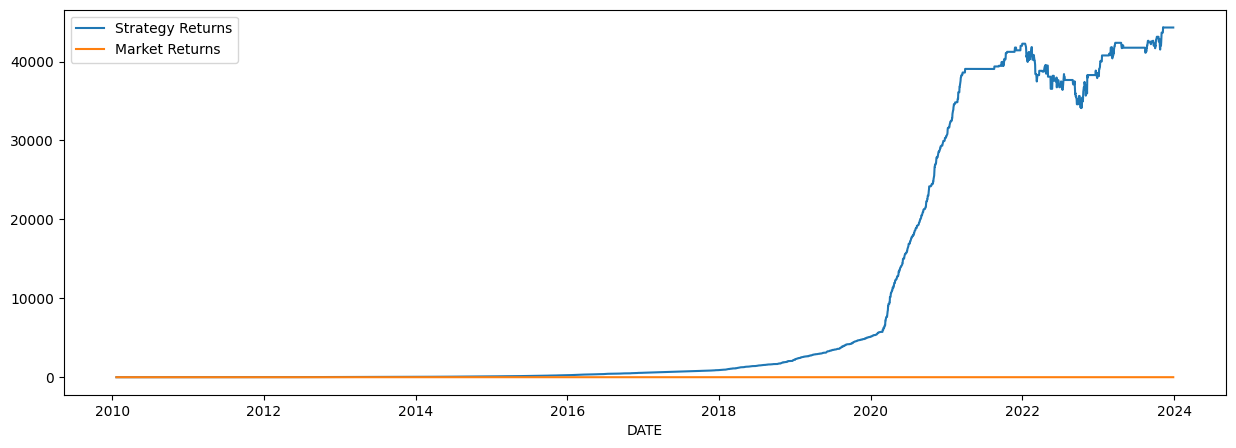

In [12]:
# Generate signals
df['Predicted_Signal'] = model.predict(X)

# Calculate returns
df['Return'] = df['Close'].pct_change().shift(-1)
df['Strategy_Return'] = df['Return'] * df['Predicted_Signal']

# Calculate cumulative returns
cumulative_strategy_returns = (1 + df['Strategy_Return']).cumprod() - 1
cumulative_market_returns = (1 + df['Return']).cumprod() - 1

plt.figure(figsize=(15, 5))
plt.plot(cumulative_strategy_returns, label='Strategy Returns')
plt.plot(cumulative_market_returns, label='Market Returns')
plt.legend()
plt.xlabel("DATE")
plt.show()


In [13]:
df = df.dropna()
df

,Open,High,Low,Close,Volume,SMA,EMA-12,EMA-26,MACD,RSI,Target,Predicted_Signal,Return,Strategy_Return
Date,,,,,,,,,,,,,,
2010-01-22 00:00:00-05:00,1115.489990,1115.489990,1090.180054,1091.760010,6208650000,1135.942854,1130.206118,1133.353746,-3.147629,33.114902,1,1,0.004598,0.004598
2010-01-25 00:00:00-05:00,1092.400024,1102.969971,1092.400024,1096.780029,4481390000,1133.356428,1125.063642,1130.644582,-5.580940,35.756431,0,0,-0.004203,-0.000000
2010-01-26 00:00:00-05:00,1095.800049,1103.689941,1089.859985,1092.170044,4731910000,1130.188572,1120.003089,1127.794616,-7.791528,32.701444,1,1,0.004880,0.004880
2010-01-27 00:00:00-05:00,1091.939941,1099.510010,1083.109985,1097.500000,5319120000,1127.357143,1116.541075,1125.550571,-9.009496,35.086501,0,0,-0.011818,-0.000000
2010-01-28 00:00:00-05:00,1096.930054,1100.219971,1078.459961,1084.530029,5452400000,1123.274292,1111.616299,1122.512012,-10.895713,29.776400,0,0,-0.009829,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21 00:00:00-05:00,4724.290039,4748.709961,4708.350098,4746.750000,3431180000,4660.161412,4684.101742,4606.831018,77.270724,69.835202,1,0,0.001660,0.000000
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,4673.364990,4694.952226,4617.779082,77.173143,75.219000,1,0,0.004232,0.000000
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,4688.191406,4707.228806,4629.406558,77.822249,77.026599,1,0,0.001430,0.000000


In [14]:
df.to_csv("res.csv")